<a href="https://colab.research.google.com/github/Sompote/tunnel/blob/main/tunnel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import tensorflow.keras as keras
df = pd.read_csv('dataframe-2.csv')
df

,TunnelDirection,Overbunden,RockType1,Color1,RockType2,Color2,RockType3,Color3,RockType4,Color4,...,Strike,Dip Angle,JointSpacing,NumberOfSpacing,Persistence,Aperture,Roughness,Infilling,Groundwater,Class
0,42,20.10,Biotite granite,"Light Gray, White, Gray",None,None,Biotite granite,"Light Gray, White, Gray",None,None,...,20,75,<6,10,<1,1-5,Slightly rough,None,Complete Dry,III Fair Rock
1,42,24.22,Biotite granite,"Light Gray, White, Gray",None,None,Biotite granite,"Light Gray, White, Gray",None,None,...,25,80,<6,13,<1,1-5,Slightly rough,Highly filling,Complete Dry,III Fair Rock
2,42,24.81,Biotite granite,"Light Gray, White, Gray",None,None,Biotite granite,"Light Gray, White, Gray",None,None,...,15,70,6-20,17,<1,1-5,Slightly rough,Highly filling,Complete Dry,III Fair Rock
3,42,25.42,Biotite granite,"Light Gray, White, Gray",None,None,Biotite granite,"Light Gray, White, Gray",None,None,...,25,85,6-20,22,<1,1-5,Slightly rough,None,Complete Dry,III Fair Rock
4,42,26.00,Biotite granite,"Light Gray, White, Gray",None,None,Biotite granite,"Light Gray, White, Gray",None,None,...,25,75,6-20,21,<1,1-5,Slightly rough,Highly filling,Complete Dry,III Fair Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0,137.38,Impure Marble,Gray to light gray,None,None,Impure Marble,Gray to light gray,None,None,...,30,65,6-20,3,3-10,0.1-1,Smooths,Soft filling,Complete Dry,III Fair Rock
384,0,138.85,Impure Marble,Gray to light gray,None,None,Impure Marble,Gray to light gray,None,None,...,30,65,6-20,3,3-10,0.1-1,Smooths,Soft filling,Complete Dry,III Fair Rock
385,0,139.52,Impure Marble,Gray to light gray,None,None,Impure Marble,Gray to light gray,None,None,...,30,65,6-20,3,3-10,0.1-1,Smooths,Soft filling,Complete Dry,III Fair Rock
386,0,140.02,Impure Marble,Gray to light gray,None,None,Impure Marble,Gray to light gray,None,None,...,30,65,6-20,3,3-10,0.1-1,Smooths,Soft filling,Complete Dry,III Fair Rock


In [83]:
df1 = df[['TunnelDirection', 'Overbunden', 'Strike', 'Dip Angle', 'JointSpacing', 'NumberOfSpacing', 'Persistence', 'Aperture', 'Class']]
df2 = df[['RockType1', 'Color1', 'RockType2', 'Color2', 'RockType3', 'Color3', 'RockType4', 'Color4', 'Stringer', 'Degree of Weathering', 'Roughness', 'Infilling', 'Groundwater']]

df2

,RockType1,Color1,RockType2,Color2,RockType3,Color3,RockType4,Color4,Stringer,Degree of Weathering,Roughness,Infilling,Groundwater
0,Biotite granite,"Light Gray, White, Gray",None,None,Biotite granite,"Light Gray, White, Gray",None,None,None,Moderately,Slightly rough,None,Complete Dry
1,Biotite granite,"Light Gray, White, Gray",None,None,Biotite granite,"Light Gray, White, Gray",None,None,None,Moderately,Slightly rough,Highly filling,Complete Dry
2,Biotite granite,"Light Gray, White, Gray",None,None,Biotite granite,"Light Gray, White, Gray",None,None,None,Moderately,Slightly rough,Highly filling,Complete Dry
3,Biotite granite,"Light Gray, White, Gray",None,None,Biotite granite,"Light Gray, White, Gray",None,None,None,Moderately,Slightly rough,None,Complete Dry
4,Biotite granite,"Light Gray, White, Gray",None,None,Biotite granite,"Light Gray, White, Gray",None,None,None,Moderately,Slightly rough,Highly filling,Complete Dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Impure Marble,Gray to light gray,None,None,Impure Marble,Gray to light gray,None,None,None,Moderately,Smooths,Soft filling,Complete Dry
384,Impure Marble,Gray to light gray,None,None,Impure Marble,Gray to light gray,None,None,None,Moderately,Smooths,Soft filling,Complete Dry
385,Impure Marble,Gray to light gray,None,None,Impure Marble,Gray to light gray,None,None,None,Moderately,Smooths,Soft filling,Complete Dry
386,Impure Marble,Gray to light gray,None,None,Impure Marble,Gray to light gray,None,None,None,Moderately,Smooths,Soft filling,Complete Dry


In [84]:
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Define a function to process a DataFrame column with BERT
def process_column(column_data):
    # Activate padding and truncation
    encoded_layers = bert_model(tokenizer(column_data.tolist(),
                                         return_tensors='tf',
                                         padding=True,
                                         truncation=True))
    return encoded_layers.last_hidden_state[:, 0, :]  # Extract [CLS] token embedding

# Load your DataFrame (replace with your actual DataFrame)

# Process each column with BERT and concatenate results
bert_outputs = []
for i in range(13):
    column_data = df2.iloc[:, i]
    bert_output = process_column(column_data)
    bert_outputs.append(bert_output)

# Concatenate BERT outputs into a NumPy array
concatenated_outputs = tf.concat(bert_outputs, axis=1).numpy()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [85]:
concatenated_outputs.shape

(388, 9984)

In [86]:
import nltk
from nltk.corpus import stopwords

df_clean = df2.copy()

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

for col in df_clean.columns:
    df_clean[col] = df_clean[col].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words]))
    df_clean[col] = df_clean[col].apply(lambda x: str(x).lower() if isinstance(x, str) else x)
    df_clean[col] = df_clean[col].str.replace('[^\w\s]', '', regex=True)

df_clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,RockType1,Color1,RockType2,Color2,RockType3,Color3,RockType4,Color4,Stringer,Degree of Weathering,Roughness,Infilling,Groundwater
0,biotite granite,light gray white gray,none,none,biotite granite,light gray white gray,none,none,none,moderately,slightly rough,none,complete dry
1,biotite granite,light gray white gray,none,none,biotite granite,light gray white gray,none,none,none,moderately,slightly rough,highly filling,complete dry
2,biotite granite,light gray white gray,none,none,biotite granite,light gray white gray,none,none,none,moderately,slightly rough,highly filling,complete dry
3,biotite granite,light gray white gray,none,none,biotite granite,light gray white gray,none,none,none,moderately,slightly rough,none,complete dry
4,biotite granite,light gray white gray,none,none,biotite granite,light gray white gray,none,none,none,moderately,slightly rough,highly filling,complete dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,impure marble,gray light gray,none,none,impure marble,gray light gray,none,none,none,moderately,smooths,soft filling,complete dry
384,impure marble,gray light gray,none,none,impure marble,gray light gray,none,none,none,moderately,smooths,soft filling,complete dry
385,impure marble,gray light gray,none,none,impure marble,gray light gray,none,none,none,moderately,smooths,soft filling,complete dry
386,impure marble,gray light gray,none,none,impure marble,gray light gray,none,none,none,moderately,smooths,soft filling,complete dry


In [87]:
df1

,TunnelDirection,Overbunden,Strike,Dip Angle,JointSpacing,NumberOfSpacing,Persistence,Aperture,Class
0,42,20.10,20,75,<6,10,<1,1-5,III Fair Rock
1,42,24.22,25,80,<6,13,<1,1-5,III Fair Rock
2,42,24.81,15,70,6-20,17,<1,1-5,III Fair Rock
3,42,25.42,25,85,6-20,22,<1,1-5,III Fair Rock
4,42,26.00,25,75,6-20,21,<1,1-5,III Fair Rock
...,...,...,...,...,...,...,...,...,...
383,0,137.38,30,65,6-20,3,3-10,0.1-1,III Fair Rock
384,0,138.85,30,65,6-20,3,3-10,0.1-1,III Fair Rock
385,0,139.52,30,65,6-20,3,3-10,0.1-1,III Fair Rock
386,0,140.02,30,65,6-20,3,3-10,0.1-1,III Fair Rock


In [88]:
def convert_value(value):
    if '<' in value:
        lower = 0
        upper = float(value[1:])
    elif '>' in value:
        lower = float(value[1:])
        upper = 999

    else:
        parts = value.split('-')
        lower = float(parts[0])
        upper = float(parts[1])
    return lower, upper

df_range = df1.copy()
df_range['LowerJointSpacing'], df_range['UpperJointSpacing'] = zip(*df_range['JointSpacing'].apply(convert_value))
df_range['LowerPersistence'], df_range['UpperPersistence'] = zip(*df_range['Persistence'].apply(convert_value))
df_range['LowerAperture'], df_range['UpperAperture'] = zip(*df_range['Aperture'].apply(convert_value))
df_range.drop(columns=['JointSpacing'], inplace=True)
df_range.drop(columns=['Persistence'], inplace=True)
df_range.drop(columns=['Aperture'], inplace=True)
df_range

,TunnelDirection,Overbunden,Strike,Dip Angle,NumberOfSpacing,Class,LowerJointSpacing,UpperJointSpacing,LowerPersistence,UpperPersistence,LowerAperture,UpperAperture
0,42,20.10,20,75,10,III Fair Rock,0.0,6.0,0.0,1.0,1.0,5.0
1,42,24.22,25,80,13,III Fair Rock,0.0,6.0,0.0,1.0,1.0,5.0
2,42,24.81,15,70,17,III Fair Rock,6.0,20.0,0.0,1.0,1.0,5.0
3,42,25.42,25,85,22,III Fair Rock,6.0,20.0,0.0,1.0,1.0,5.0
4,42,26.00,25,75,21,III Fair Rock,6.0,20.0,0.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
383,0,137.38,30,65,3,III Fair Rock,6.0,20.0,3.0,10.0,0.1,1.0
384,0,138.85,30,65,3,III Fair Rock,6.0,20.0,3.0,10.0,0.1,1.0
385,0,139.52,30,65,3,III Fair Rock,6.0,20.0,3.0,10.0,0.1,1.0
386,0,140.02,30,65,3,III Fair Rock,6.0,20.0,3.0,10.0,0.1,1.0


In [89]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded = df_range.copy()
df_encoded['ClassEncoded'] = label_encoder.fit_transform(df_encoded['Class'])
df_encoded.drop(columns=['Class'], inplace=True)
df_encoded

,TunnelDirection,Overbunden,Strike,Dip Angle,NumberOfSpacing,LowerJointSpacing,UpperJointSpacing,LowerPersistence,UpperPersistence,LowerAperture,UpperAperture,ClassEncoded
0,42,20.10,20,75,10,0.0,6.0,0.0,1.0,1.0,5.0,1
1,42,24.22,25,80,13,0.0,6.0,0.0,1.0,1.0,5.0,1
2,42,24.81,15,70,17,6.0,20.0,0.0,1.0,1.0,5.0,1
3,42,25.42,25,85,22,6.0,20.0,0.0,1.0,1.0,5.0,1
4,42,26.00,25,75,21,6.0,20.0,0.0,1.0,1.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
383,0,137.38,30,65,3,6.0,20.0,3.0,10.0,0.1,1.0,1
384,0,138.85,30,65,3,6.0,20.0,3.0,10.0,0.1,1.0,1
385,0,139.52,30,65,3,6.0,20.0,3.0,10.0,0.1,1.0,1
386,0,140.02,30,65,3,6.0,20.0,3.0,10.0,0.1,1.0,1


In [90]:
df_encoded = df_encoded.astype(float)
df_encoded

,TunnelDirection,Overbunden,Strike,Dip Angle,NumberOfSpacing,LowerJointSpacing,UpperJointSpacing,LowerPersistence,UpperPersistence,LowerAperture,UpperAperture,ClassEncoded
0,42.0,20.10,20.0,75.0,10.0,0.0,6.0,0.0,1.0,1.0,5.0,1.0
1,42.0,24.22,25.0,80.0,13.0,0.0,6.0,0.0,1.0,1.0,5.0,1.0
2,42.0,24.81,15.0,70.0,17.0,6.0,20.0,0.0,1.0,1.0,5.0,1.0
3,42.0,25.42,25.0,85.0,22.0,6.0,20.0,0.0,1.0,1.0,5.0,1.0
4,42.0,26.00,25.0,75.0,21.0,6.0,20.0,0.0,1.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.0,137.38,30.0,65.0,3.0,6.0,20.0,3.0,10.0,0.1,1.0,1.0
384,0.0,138.85,30.0,65.0,3.0,6.0,20.0,3.0,10.0,0.1,1.0,1.0
385,0.0,139.52,30.0,65.0,3.0,6.0,20.0,3.0,10.0,0.1,1.0,1.0
386,0.0,140.02,30.0,65.0,3.0,6.0,20.0,3.0,10.0,0.1,1.0,1.0


In [91]:
df_numpy = df_encoded.to_numpy()
df_numpy

array([[4.2000e+01, 2.0100e+01, 2.0000e+01, ..., 1.0000e+00, 5.0000e+00,
        1.0000e+00],
       [4.2000e+01, 2.4220e+01, 2.5000e+01, ..., 1.0000e+00, 5.0000e+00,
        1.0000e+00],
       [4.2000e+01, 2.4810e+01, 1.5000e+01, ..., 1.0000e+00, 5.0000e+00,
        1.0000e+00],
       ...,
       [0.0000e+00, 1.3952e+02, 3.0000e+01, ..., 1.0000e-01, 1.0000e+00,
        1.0000e+00],
       [0.0000e+00, 1.4002e+02, 3.0000e+01, ..., 1.0000e-01, 1.0000e+00,
        1.0000e+00],
       [0.0000e+00, 1.4129e+02, 3.0000e+01, ..., 1.0000e-01, 1.0000e+00,
        1.0000e+00]])

In [92]:
df_numpy.shape

(388, 12)

In [103]:
df_combined = np.concatenate((df_numpy, concatenated_outputs),axis=1)
from sklearn.model_selection import train_test_split
training, testing1 = train_test_split(df_combined, test_size=0.2, shuffle= True,random_state=1)
validation, testing = train_test_split(testing1, test_size=0.5, shuffle= True,random_state=1)

In [104]:
print(training.shape)
print(testing.shape)
print(validation.shape)

(310, 9996)
(39, 9996)
(39, 9996)


In [105]:
training_x_1=training[:,0:11]
training_x_2=training[:,12:-1]
training_y = training[:, 11]
validation_y = validation[:, 11]
validation_x1 = validation[:,0:11]
validation_x2 = validation[:,12:-1]
testing_x1 = testing[:,0:11]
testing_x2 = testing[:,12:-1]
testing_y = testing[:, 11]


In [106]:
training_x_2.shape

(310, 9983)

In [107]:
from tensorflow.keras.utils import to_categorical

training_y = to_categorical(training_y, num_classes=3)
validation_y = to_categorical(validation_y, num_classes=3)
testing_y = to_categorical(testing_y, num_classes=3)

In [108]:
print(training_x_1.shape)
print(training_y.shape)

(310, 11)
(310, 3)


In [115]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Input tensors with specified shapes
input_1 = layers.Input(shape=(11,))
input_2 = layers.Input(shape=(9983,))

# First branch: Dense layers for input_1
x1 = layers.Dense(1000, activation='relu')(input_2)
x1 = layers.Dense(500, activation='relu')(x1)
x1 = layers.Dense(50, activation='relu')(x1)
x1 = layers.Dense(11, activation='relu')(x1)

# Second branch: Dense layers for input_2
x2 = layers.Dense(11, activation='relu')(input_1)
x2 = layers.Dense(11, activation='relu')(x2)

# Concatenate the outputs of both branches
concatenated = layers.Concatenate()([x1, x2])

# Shared dense layers for classification
x = layers.Dense(10, activation='relu')(concatenated)
output = layers.Dense(3, activation='softmax')(x)

# Create the model
model = models.Model(inputs=[input_1, input_2], outputs=output)

# Compile the model with appropriate optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (replace with your training data and parameters)
history = model.fit(
    [training_x_1, training_x_2], training_y,
    epochs=400, batch_size=70,
    validation_data=([validation_x1, validation_x2], validation_y)
)

Epoch 1/400
5/5 [==============================] - 2s 65ms/step - loss: 5.6801 - accuracy: 0.3806 - val_loss: 1.9010 - val_accuracy: 0.3333
Epoch 2/400
5/5 [==============================] - 0s 13ms/step - loss: 2.0458 - accuracy: 0.3935 - val_loss: 1.3142 - val_accuracy: 0.3590
Epoch 3/400
5/5 [==============================] - 0s 13ms/step - loss: 1.5501 - accuracy: 0.5516 - val_loss: 1.2022 - val_accuracy: 0.5641
Epoch 4/400
5/5 [==============================] - 0s 13ms/step - loss: 1.3126 - accuracy: 0.7774 - val_loss: 0.6889 - val_accuracy: 0.8462
Epoch 5/400
5/5 [==============================] - 0s 13ms/step - loss: 1.1949 - accuracy: 0.7774 - val_loss: 0.7076 - val_accuracy: 0.6923
Epoch 6/400
5/5 [==============================] - 0s 13ms/step - loss: 1.0026 - accuracy: 0.7742 - val_loss: 0.7693 - val_accuracy: 0.7179
Epoch 7/400
5/5 [==============================] - 0s 13ms/step - loss: 0.7135 - accuracy: 0.7774 - val_loss: 0.4646 - val_accuracy: 0.7949
Epoch 8/400
5/5 [===

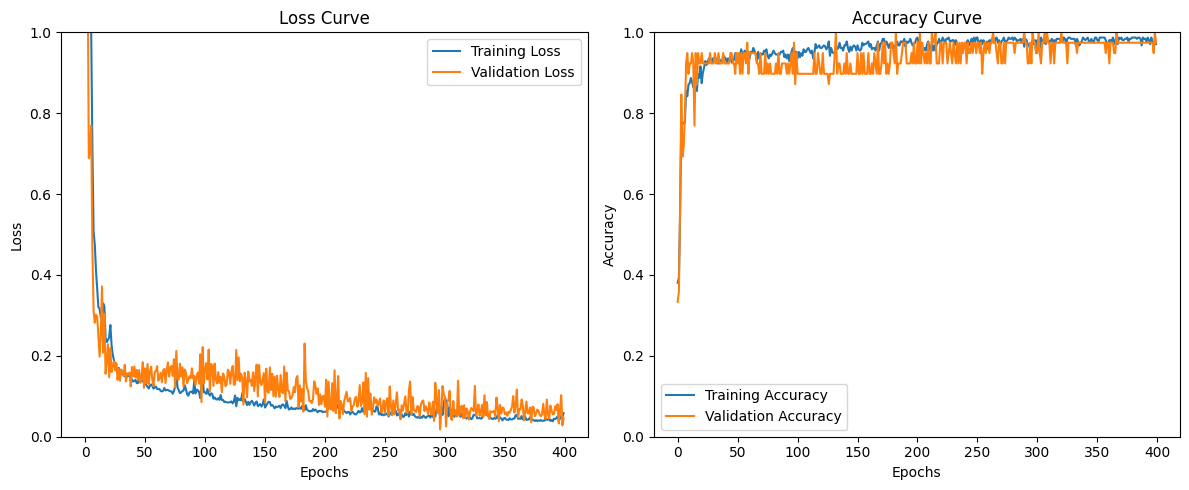

In [116]:
import matplotlib.pyplot as plt
def plot_curves(history):
    # พล็อต Loss Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.ylim(0,1)

    # พล็อต Accuracy Curve
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.ylim(0,1)

    plt.tight_layout()
    plt.show()

plot_curves(history)

In [117]:
#evaluate model
#Evaluate the model on the test data
loss, accuracy = model.evaluate([testing_x1,testing_x2], testing_y, verbose=2)

# Print the accuracy
print('Accuracy:', accuracy)

2/2 - 0s - loss: 0.0374 - accuracy: 0.9744 - 25ms/epoch - 13ms/step
Accuracy: 0.9743589758872986


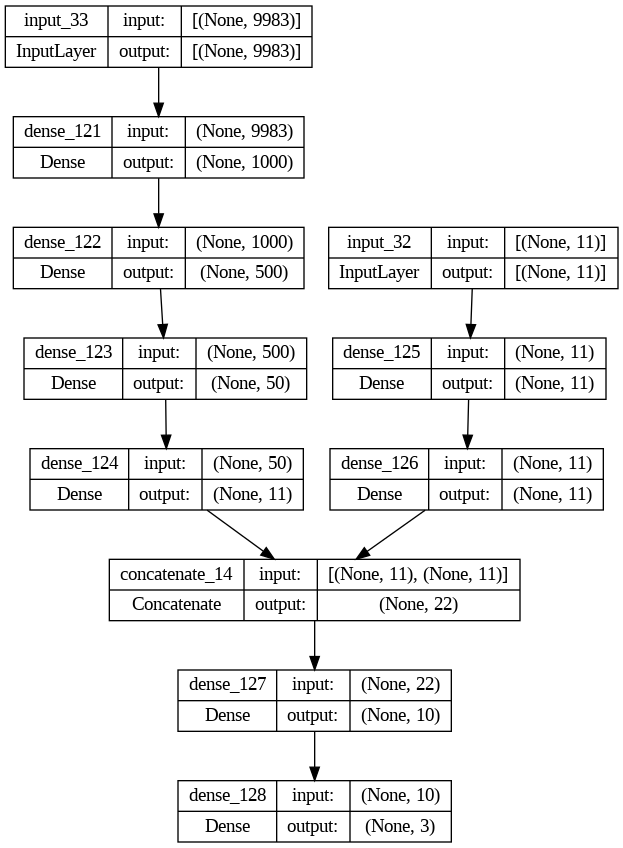

In [118]:
from tensorflow.keras.utils import plot_model

# ... (your model definition code)

plot_model(model, to_file='model_structure.png', show_shapes=True)